In [25]:
library(tidyverse)
library(dplyr)# mean+group_by

library(ggplot2)
library(ggpubr) #plot
library(rstatix) #easy statistical analyses

library(reshape)
library(car)
library(effsize)

# Import data

In [26]:
# pca data
usa_pca_data = read.csv('../output_data/pca_results/USA/USA_scores_var_33d.csv',
                   row.names=1)
colnames(usa_pca_data) = c('Formality','Activeness','Valence','Exchange','Equality')
usa_pca_data['Equality'] = -usa_pca_data['Equality']

chn_pca_data = read.csv('../output_data/pca_results/CHN/CHN_NLP_159rel_33d_scores_var.csv',
                   row.names=1)
colnames(chn_pca_data) = c('Valence','Exchange','Equality','Formality','Activeness')
chn_pca_data['Equality'] = -chn_pca_data['Equality']

In [27]:
umap_exp_6k = read.csv('../../../Study1/Categorical_model/output_data/group/category/cluster_results/umap_exp_results_159r_all_fixlabel.csv',
                       row.names = 1)
Hostile = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 5,])
print(paste('Hostile:',length(Hostile)))
Hostile
Familial = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 2,])
print(paste('Familial:',length(Familial)))
Familial
Romantic = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 3,])
print(paste('Romantic:',length(Romantic)))
Romantic
Affiliative = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 1,])
print(paste('Affiliative:',length(Affiliative)))
Affiliative
Transactional = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 4,])
print(paste('Transactional:',length(Transactional)))
Transactional
Power = rownames(umap_exp_6k[umap_exp_6k['cl_k6'] == 0,])
print(paste('Power:',length(Power)))
Power

[1] "Hostile: 25"


[1] "Between business rivals"              
 [2] "Police officer and Offender"          
 [3] "Criminal and Prosecutor"              
 [4] "Parole officer and Parolee"           
 [5] "Between divorced spouses"             
 [6] "Bully and Victim"                     
 [7] "Victim and Criminal"                  
 [8] "Guard and Prisoner"                   
 [9] "Between competitors in sports"        
[10] "Between fans of opposing sports teams"
[11] "Defendant and Plaintiff"              
[12] "Man Wife and Man Mistress"            
[13] "Between ex-lovers"                    
[14] "Between opposing negotiators"         
[15] "Celebrity and Haters"                 
[16] "Between political opponents"          
[17] "Between enemies"                      
[18] "Criminal and Hostage"                 
[19] "Slave and Master"                     
[20] "Between frenemies"                    
[21] "Between sports rivals"                
[22] "Police officer and Civilian"          
[23] "Criminal and Police officer"          
[24] "Between romantic rivals"              
[25] "Master and Servant"

[1] "Familial: 23"


[1] "Uncle and Niece/Nephew"                   
 [2] "Between close relatives"                  
 [3] "Between a person and their in-laws"       
 [4] "Between distant relatives"                
 [5] "Mother and Infant"                        
 [6] "Between second cousins"                   
 [7] "Ancestor and Descendant"                  
 [8] "Godparent and Godchild"                   
 [9] "Between twins"                            
[10] "Parent and Child"                         
[11] "Brother and Sister"                       
[12] "Aunt and Niece/Nephew"                    
[13] "Between step-siblings"                    
[14] "Step-parent and Step-child"               
[15] "Between cousins"                          
[16] "Between half-siblings"                    
[17] "Parent and Teenager"                      
[18] "Foster-parent and Foster-child"           
[19] "Between Siblings"                         
[20] "Between adoptive parents and adopted kids"
[21] "Step-grandparent and Step-grandchild"     
[22] "Parent and Infant"                        
[23] "Grandparent and Grandchild"

[1] "Romantic: 13"


[1] "Between long-distance lovers"                
 [2] "Sugar-daddy and Sugar-baby"                  
 [3] "Between a person and their deceased spouse"  
 [4] "Between life-partners"                       
 [5] "Between romantic lovers"                     
 [6] "Between soul-mates"                          
 [7] "Fiance and Fiancee"                          
 [8] "Between a person and their crush"            
 [9] "Between a person and their significant other"
[10] "Between friends with benefits"               
[11] "Wife and Husband"                            
[12] "Man and His Mistress"                        
[13] "Bride and Groom"

[1] "Affiliative: 33"


[1] "Between a person and their social media follower"
 [2] "Between alumni"                                  
 [3] "Between childhood friends"                       
 [4] "Between peers"                                   
 [5] "Groom and Groomsman"                             
 [6] "Between friends"                                 
 [7] "Between strangers"                               
 [8] "Between teammates in sports"                     
 [9] "Between companions"                              
[10] "Between sorority sisters"                        
[11] "Between diplomats"                               
[12] "Between cohabitants"                             
[13] "Between casual acquaintances"                    
[14] "Between criminal and their accomplice"           
[15] "Between Business Partners"                       
[16] "Between neighbors"                               
[17] "Between fraternity brothers"                     
[18] "Between fans of the same sports team"            
[19] "Between roommates"                               
[20] "Between pen-friends"                             
[21] "Between church members"                          
[22] "Between political allies"                        
[23] "Between Facebook Friends"                        
[24] "Between Close Friends"                           
[25] "Victim and Witness"                              
[26] "Between classmates"                              
[27] "Bride and Bridesmaid"                            
[28] "Between a person and their family friends"       
[29] "Between playmates"                               
[30] "Between religious followers"                     
[31] "Between confidants"                              
[32] "Between Co-workers"                              
[33] "Between brothers-in-arms"

[1] "Transactional: 30"


[1] "Native and Tourist"              "Driver and Passenger"           
 [3] "Nurse and Patient"               "Representative and Citizen"     
 [5] "Reviewer and Writer"             "Entrepreneur and Investor"      
 [7] "Dealer and Buyer"                "Reader and Writer"              
 [9] "Patient and Caretaker"           "Psychologist and Client"        
[11] "Therapist and Patient"           "Politician and Supporter"       
[13] "Landlord and Tenant"             "Doctor and Patient"             
[15] "Prostitute and Customer"         "Researcher and Research Subject"
[17] "Lawyer and Client"               "Guide and Tourist"              
[19] "Salesperson and Customer"        "Drug dealer and Addict"         
[21] "Consultant and Client"           "Customer and Businessman"       
[23] "Chef and Customer"               "Performer and Audience"         
[25] "Guest and Host"                  "Babysitter and Infant"          
[27] "Television host and Guest"       "Customer and Server"            
[29] "Celebrity and Fans"              "Judge and Contestant"

[1] "Power: 35"


[1] "Student and Dorm Resident assistant" 
 [2] "Union leader and union member"       
 [3] "Intern and Employee"                 
 [4] "Mentor and Mentee"                   
 [5] "Religious leader and Congregant"     
 [6] "Teacher and Student"                 
 [7] "Employer and Employee"               
 [8] "Supervisor and Subordinate"          
 [9] "Team Captain and Team Members"       
[10] "Predecessor and Successor"           
[11] "Interviewer and Job applicant"       
[12] "Officer and Soldier"                 
[13] "Between a monarch and their minister"
[14] "Professor and Graduate student"      
[15] "Director and Performer"              
[16] "Athletic trainer and Trainee"        
[17] "Doctor and Nurse"                    
[18] "Landlord and Housekeeper"            
[19] "Foreman and Laborer"                 
[20] "Superior and Subordinate"            
[21] "Club Member and Club President"      
[22] "Chief and Deputy"                    
[23] "Athlete and Referee"                 
[24] "Principal and Teacher"               
[25] "Judge and Lawyer"                    
[26] "Coach and athlete"                   
[27] "University student and Administrator"
[28] "Leader and Follower"                 
[29] "Man and God"                         
[30] "Volunteer and Organizer"             
[31] "Manager and Staff"                   
[32] "Owner and Manager"                   
[33] "Manager and Assistant"               
[34] "Boss and Secretary"                  
[35] "Professor and Teaching Assistant"

In [28]:
Private = c(Familial,Romantic,
 'Between childhood friends','Groom and Groomsman','Between friends',
 'Between companions',#'Between sorority sisters',
 'Between cohabitants',#'Between fraternity brothers',#'Between roommates',
 'Between pen-friends','Between Facebook Friends','Between Close Friends',
 'Bride and Bridesmaid','Between a person and their family friends',
 'Between playmates','Between confidants')

Public = c(Transactional,Power)

In [29]:
write.csv(Private,'selected_rels/Private.csv')
write.csv(Public,'selected_rels/Public.csv')

# ANOVA: PCA

In [30]:
compare_usa_pca_data = usa_pca_data[c(Private,Public),]
compare_usa_pca_data = compare_usa_pca_data %>% mutate(cluster = 
                    case_when(rownames(compare_usa_pca_data)%in%Private~'Private',
                              rownames(compare_usa_pca_data)%in%Public~'Public')) 

compare_chn_pca_data = chn_pca_data[c(Private,Public),]
compare_chn_pca_data = compare_chn_pca_data %>% mutate(cluster = 
                    case_when(rownames(compare_chn_pca_data)%in%Private~'Private',
                              rownames(compare_chn_pca_data)%in%Public~'Public'))

,Effect,DFn,DFd,F,p,p<.05,pes
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,cluster,1,222,80.002,1.50e-16,*,0.265
2,region,1,222,0.580,4.47e-01,,0.003
3,cluster:region,1,222,7.358,7.00e-03,*,0.032


cluster .y.      group1 group2 n1 n2 p      p.signif p.adj  p.adj.signif
1 Private Exchange CHN    USA    48 48 0.0115 *        0.0115 *           
2 Public  Exchange CHN    USA    65 65 0.1660 ns       0.1660 ns          
  y.position groups <NA> x xmin xmax
1 3.3882     CHN    CHN  1 0.8  1.2 
2 3.5632     USA    USA  2 1.8  2.2

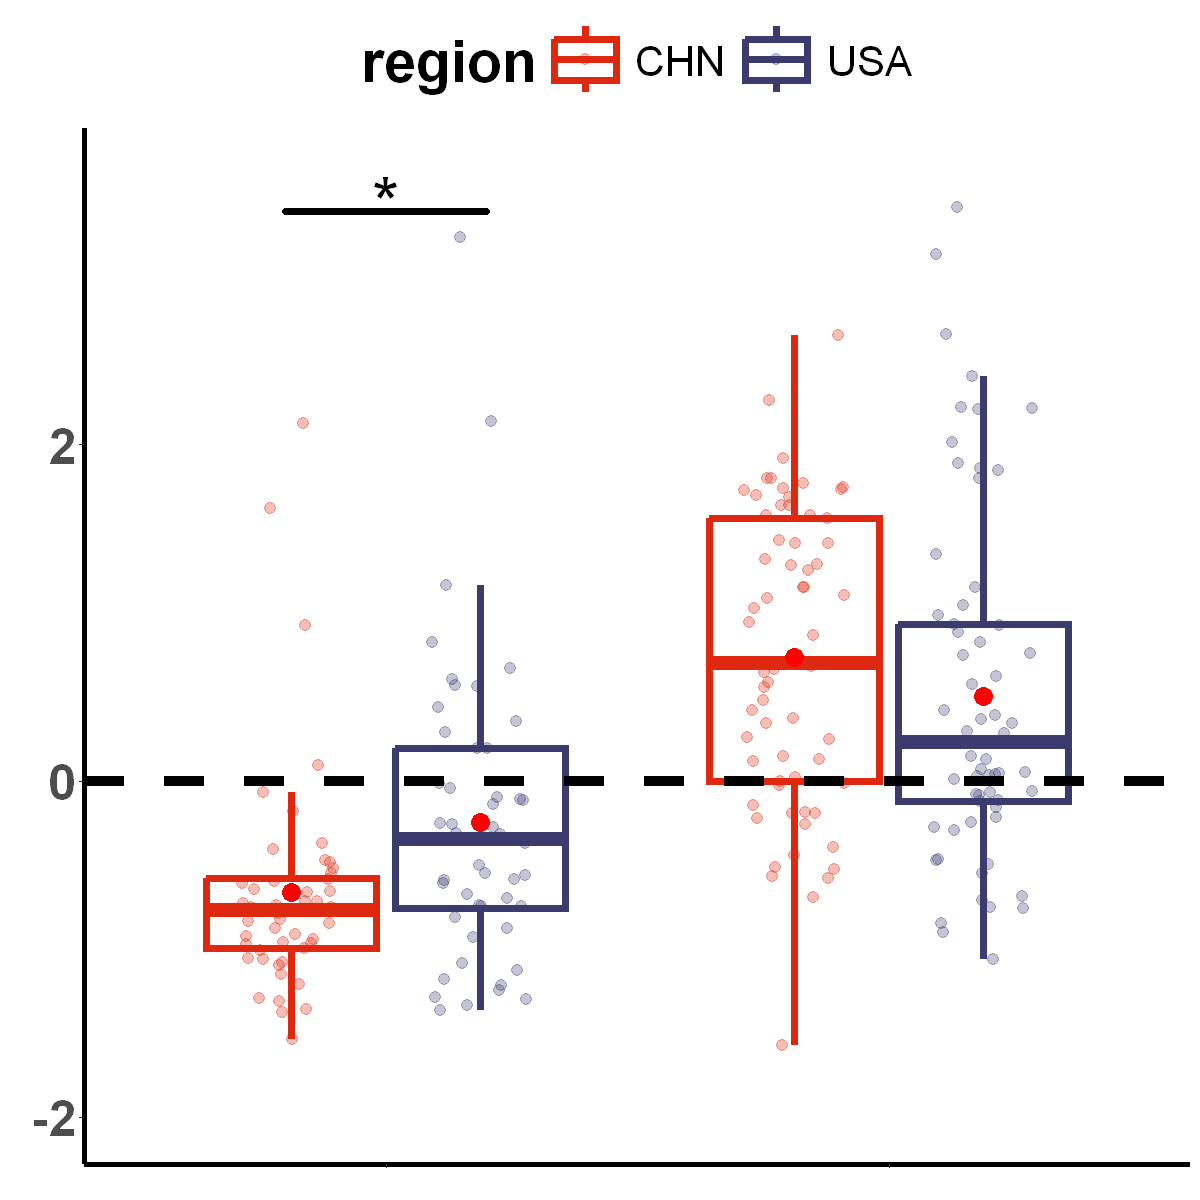

In [31]:
usa_pca_data_dim = compare_usa_pca_data[c('Exchange','cluster')]
usa_pca_data_dim$region = 'USA'

chn_pca_data_dim = compare_chn_pca_data[c('Exchange','cluster')]
chn_pca_data_dim$region = 'CHN'

pca_data_dim = rbind(usa_pca_data_dim,chn_pca_data_dim)
pca_data_dim$rel = rownames(pca_data_dim)

res.aov = anova_test(
    data = pca_data_dim,dv = Exchange, wid = rel,
    between = c(cluster,region), effect.size = "pes")
get_anova_table(res.aov)

# Post hoc
pwc <- pca_data_dim %>%
  group_by(cluster) %>%
  pairwise_t_test(Exchange ~ region, p.adjust.method = "bonferroni",paired=FALSE) #%>%
  #select(-p, -p.signif) # Remove details
pwc <- pwc %>% add_xy_position(x = "cluster")
pwc

# Visualization
my_color = c('USA'='#3C3B6E','CHN'='#DE2910')
options(repr.plot.width = 10,repr.plot.height = 10)
ggplot(pca_data_dim)+
geom_boxplot(aes(x=cluster,y=Exchange,color=region),
             outlier.alpha = 0,size=2)+
geom_point(aes(x=cluster,y=Exchange,color=region),position = position_jitterdodge(0.2),size=3,alpha=0.3)+
stat_summary(aes(x=cluster,y=Exchange,group=region),position=position_dodge(0.75),
             fun='mean',color='red',size=5,geom='point')+
scale_color_manual(values=my_color)+
geom_hline(yintercept = 0,linetype='dashed',size = 3)+
# scale_x_discrete(labels = c("psy" = "psychological","phy" = "physical"))+

stat_pvalue_manual(pwc, tip.length = 0, hide.ns = TRUE,size = 15,bracket.size = 2)+

theme_classic()+
theme(#axis.text.x = element_text(size=36,face='bold'),
      axis.text.x = element_blank(),
      axis.text.y = element_text(size=30,face='bold'),
      legend.key.size = unit(50,'pt'),
      legend.title = element_text(size=35,face='bold'),
      legend.text = element_text(size=25),
      legend.position = 'top',
      axis.line = element_line(linetype=1,color="black",size=1.5))+
xlab('')+
ylab('')+
ylim(-2,3.6)

In [32]:
head(pca_data_dim)

,Exchange,cluster,region,rel
,<dbl>,<chr>,<chr>,<chr>
Uncle and Niece/Nephew,-0.5898620,Private,USA,Uncle and Niece/Nephew
Between close relatives,-0.6981347,Private,USA,Between close relatives
Between a person and their in-laws,-0.3740008,Private,USA,Between a person and their in-laws
Between distant relatives,-1.0836667,Private,USA,Between distant relatives
Mother and Infant,-0.3114943,Private,USA,Mother and Infant
Between second cousins,-1.1243325,Private,USA,Between second cousins


In [33]:
usa_private = pca_data_dim %>% filter(cluster == 'Private') %>% filter(region == 'USA')
chn_private = pca_data_dim %>% filter(cluster == 'Private') %>% filter(region == 'CHN')

levene = leveneTest(Exchange~region, pca_data_dim %>% filter(cluster == 'Private'))
print(levene)
t.test(chn_private$'Exchange', usa_private$'Exchange', paired = FALSE, var.equal = FALSE)
cohen.d(chn_private$'Exchange', usa_private$'Exchange')

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
      Df F value  Pr(>F)  
group  1  3.8886 0.05155 .
      94                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



	Welch Two Sample t-test

data:  chn_private$Exchange and usa_private$Exchange
t = -2.5784, df = 87.77, p-value = 0.01159
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.73801513 -0.09553179
sample estimates:
 mean of x  mean of y 
-0.6632460 -0.2464726 



Cohen's d

d estimate: -0.5263076 (medium)
95 percent confidence interval:
     lower      upper 
-0.9385578 -0.1140574 


In [36]:
usa_public = pca_data_dim %>% filter(cluster == 'Public') %>% filter(region == 'USA')
chn_public = pca_data_dim %>% filter(cluster == 'Public') %>% filter(region == 'CHN')

levene = leveneTest(Exchange~region, pca_data_dim %>% filter(cluster == 'Public'))
print(levene)
t.test(chn_public$'Exchange', usa_public$'Exchange', paired = FALSE, var.equal = TRUE)
cohen.d(chn_public$'Exchange', usa_public$'Exchange')

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.0139 0.9065
      128               



	Two Sample t-test

data:  chn_public$Exchange and usa_public$Exchange
t = 1.3928, df = 128, p-value = 0.1661
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.09846869  0.56666528
sample estimates:
mean of x mean of y 
0.7353067 0.5012084 



Cohen's d

d estimate: 0.2443155 (small)
95 percent confidence interval:
     lower      upper 
-0.1040588  0.5926897 


In [35]:
# Visualization
png("../../output_graph/USA_CHN/Exchange.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)

my_color = c('USA'='#3C3B6E','CHN'='#DE2910')
options(repr.plot.width = 7,repr.plot.height = 7)
ggplot(pca_data_dim)+
geom_boxplot(aes(x=cluster,y=Exchange,color=region),
             outlier.alpha = 0,size=2)+
geom_point(aes(x=cluster,y=Exchange,color=region),position = position_jitterdodge(0.2),size=3,alpha=0.3)+
stat_summary(aes(x=cluster,y=Exchange,group=region),position=position_dodge(0.75),
             fun='mean',color='red',size=5,geom='point')+
scale_color_manual(values=my_color)+
geom_hline(yintercept = 0,linetype='dashed',size = 3)+
# scale_x_discrete(labels = c("psy" = "psychological","phy" = "physical"))+

#stat_pvalue_manual(pwc, tip.length = 0, hide.ns = TRUE,size = 15,bracket.size = 2)+

theme_classic()+
theme(#axis.text.x = element_text(size=36,face='bold'),
      axis.text.x = element_blank(),
      #axis.text.y = element_text(size=30,face='bold'),
      axis.text.y = element_blank(),
      legend.key.size = unit(50,'pt'),
      legend.title = element_text(size=35,face='bold'),
      legend.text = element_text(size=25),
      legend.position = 'top',
      axis.line = element_line(linetype=1,color="black",size=1.5))+
xlab('')+
ylab('')+
ylim(-2,3.6)
dev.off()

png 
  2